In [61]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [62]:
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [63]:
df = pd.read_csv("train_and_test2.csv")

In [64]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [66]:
df.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [67]:
df.tail()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1308,1309,28.0,22.3583,0,1,0,0,0,0,0,...,0,0,0,3,0,0,0.0,0,0,0


In [68]:
df.shape

(1309, 28)

In [69]:
df.dtypes

Passengerid      int64
Age            float64
Fare           float64
Sex              int64
sibsp            int64
zero             int64
zero.1           int64
zero.2           int64
zero.3           int64
zero.4           int64
zero.5           int64
zero.6           int64
Parch            int64
zero.7           int64
zero.8           int64
zero.9           int64
zero.10          int64
zero.11          int64
zero.12          int64
zero.13          int64
zero.14          int64
Pclass           int64
zero.15          int64
zero.16          int64
Embarked       float64
zero.17          int64
zero.18          int64
2urvived         int64
dtype: object

In [70]:
del df["Passengerid"]

In [71]:
df

,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,22.0,7.2500,0,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,38.0,71.2833,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,26.0,7.9250,1,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,35.0,53.1000,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,35.0,8.0500,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,39.0,108.9000,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,38.5,7.2500,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,28.0,8.0500,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [72]:
df["zero"].describe()

count    1309.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: zero, dtype: float64

In [73]:
df.drop(['zero','zero.1'], axis=1, inplace = True)


In [74]:
df.head()

,Age,Fare,Sex,sibsp,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,22.0,7.2500,0,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,38.0,71.2833,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,26.0,7.9250,1,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,35.0,53.1000,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,35.0,8.0500,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [75]:
df.drop(['zero.2','zero.3','zero.4','zero.5','zero.6','zero.7','zero.8','zero.9','zero.10','zero.11','zero.12','zero.13','zero.14','zero.15','zero.16','zero.17','zero.18'], axis=1, inplace = True)

In [76]:
df.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [77]:
df.rename(columns = {'2urvived':'Survived'}, inplace = True)
print("\nAfter modifying first column:\n", df.columns)


After modifying first column:
 Index(['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked',
       'Survived'],
      dtype='object')


In [79]:
df.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [80]:
new_survived = pd.Categorical(df["Survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])              

new_survived.describe()


,counts,freqs
categories,,
Died,967,0.738732
Survived,342,0.261268


In [81]:
df["Age"].describe()

count    1309.000000
mean       29.503186
std        12.905241
min         0.170000
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: Age, dtype: float64

In [82]:
missing = np.where(df["Age"].isnull() == True)
missing

(array([], dtype=int64),)

In [83]:
len(missing[0])

0

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

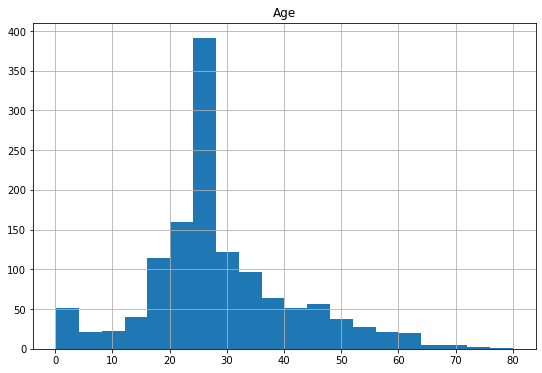

In [84]:
df.hist(column='Age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

In [43]:
df["Fare"].describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [44]:
missing = np.where(df["Fare"].isnull() == True)
missing

(array([], dtype=int64),)

In [46]:
len(missing[0])

0

<AxesSubplot:>

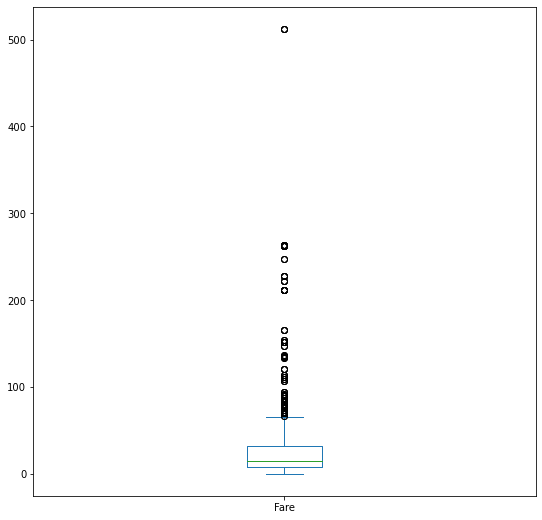

In [47]:
df["Fare"].plot(kind="box",
                           figsize=(9,9))

In [85]:
index = np.where(df["Fare"] == max(df["Fare"]) )

df.loc[index]

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
258,35.0,512.3292,1,0,0,1,0.0,1
679,36.0,512.3292,0,0,1,1,0.0,1
737,35.0,512.3292,0,0,0,1,0.0,1
1234,58.0,512.3292,1,0,1,1,0.0,0


In [87]:
df["Parch"].describe()

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: Parch, dtype: float64

In [88]:
df["sibsp"].describe()

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: sibsp, dtype: float64

In [89]:
df.rename(columns = {'sibsp':'Sib Sp'}, inplace = True)
print("\nAfter modifying first column:\n", df.columns)


After modifying first column:
 Index(['Age', 'Fare', 'Sex', 'Sib Sp', 'Parch', 'Pclass', 'Embarked',
       'Survived'],
      dtype='object')


In [90]:
df

,Age,Fare,Sex,Sib Sp,Parch,Pclass,Embarked,Survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,3,2.0,0
1305,39.0,108.9000,1,0,0,1,0.0,0
1306,38.5,7.2500,0,0,0,3,2.0,0
1307,28.0,8.0500,0,0,0,3,2.0,0


In [94]:
df["Family"] = df["Sib Sp"] + df["Parch"]


,Age,Fare,Sex,Sib Sp,Parch,Pclass,Embarked,Survived,Family
0,22.0,7.2500,0,1,0,3,2.0,0,1
1,38.0,71.2833,1,1,0,1,0.0,1,1
2,26.0,7.9250,1,0,0,3,2.0,1,0
3,35.0,53.1000,1,1,0,1,2.0,1,1
4,35.0,8.0500,0,0,0,3,2.0,0,0
...,...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,3,2.0,0,0
1305,39.0,108.9000,1,0,0,1,0.0,0,0
1306,38.5,7.2500,0,0,0,3,2.0,0,0
1307,28.0,8.0500,0,0,0,3,2.0,0,0


In [96]:
most_family = np.where(df["Family"] == max(df["Family"]))

df.loc[most_family]

,Age,Fare,Sex,Sib Sp,Parch,Pclass,Embarked,Survived,Family
159,28.0,69.55,0,8,2,3,2.0,0,10
180,28.0,69.55,1,8,2,3,2.0,0,10
201,28.0,69.55,0,8,2,3,2.0,0,10
324,28.0,69.55,0,8,2,3,2.0,0,10
792,28.0,69.55,1,8,2,3,2.0,0,10
846,28.0,69.55,0,8,2,3,2.0,0,10
863,28.0,69.55,1,8,2,3,2.0,0,10
1079,28.0,69.55,1,8,2,3,2.0,0,10
1233,28.0,69.55,0,1,9,3,2.0,0,10
1251,14.5,69.55,0,8,2,3,2.0,0,10


In [101]:
new_Pclass = pd.Categorical(df["Pclass"],ordered = True)
new_Pclass = new_Pclass.rename_categories(["Class 1","Class 2","Class 3"])              

new_Pclass.describe()

,counts,freqs
categories,,
Class 1,323,0.246753
Class 2,277,0.211612
Class 3,709,0.541635


In [103]:
df["Pclass"] = new_Pclass

In [104]:
df.head()

,Age,Fare,Sex,Sib Sp,Parch,Pclass,Embarked,Survived,Family
0,22.0,7.2500,0,1,0,Class 3,2.0,0,1
1,38.0,71.2833,1,1,0,Class 1,0.0,1,1
2,26.0,7.9250,1,0,0,Class 3,2.0,1,0
3,35.0,53.1000,1,1,0,Class 1,2.0,1,1
4,35.0,8.0500,0,0,0,Class 3,2.0,0,0


In [112]:
new_Sex = pd.Categorical(df["Sex"],ordered = True)
new_Sex = new_Sex.rename_categories(["Male","Female"])              

new_Sex.describe()
df["Sex"] = new_Sex

In [113]:
df.head()

,Age,Fare,Sex,Sib Sp,Parch,Pclass,Embarked,Survived,Family,new_Sex
0,22.0,7.2500,Male,1,0,Class 3,2.0,0,1,Male
1,38.0,71.2833,Female,1,0,Class 1,0.0,1,1,Female
2,26.0,7.9250,Female,0,0,Class 3,2.0,1,0,Female
3,35.0,53.1000,Female,1,0,Class 1,2.0,1,1,Female
4,35.0,8.0500,Male,0,0,Class 3,2.0,0,0,Male


In [116]:
df.drop(["new_Sex"],axis = 1,inplace = True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Age       1309 non-null   float64 
 1   Fare      1309 non-null   float64 
 2   Sex       1309 non-null   category
 3   Sib Sp    1309 non-null   int64   
 4   Parch     1309 non-null   int64   
 5   Pclass    1309 non-null   category
 6   Embarked  1307 non-null   float64 
 7   Survived  1309 non-null   int64   
 8   Family    1309 non-null   int64   
dtypes: category(2), float64(3), int64(4)
memory usage: 74.5 KB


In [119]:
df["Embarked"].describe()

count    1307.000000
mean        1.492731
std         0.814626
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Embarked, dtype: float64

In [121]:
missing = np.where(df["Embarked"].isnull() == True)
missing

(array([ 61, 829], dtype=int64),)

In [124]:
len(missing[0])

2

In [125]:
df.isnull()

,Age,Fare,Sex,Sib Sp,Parch,Pclass,Embarked,Survived,Family
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False
1305,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False


In [127]:
df.head(1309)

,Age,Fare,Sex,Sib Sp,Parch,Pclass,Embarked,Survived,Family
0,22.0,7.2500,Male,1,0,Class 3,2.0,0,1
1,38.0,71.2833,Female,1,0,Class 1,0.0,1,1
2,26.0,7.9250,Female,0,0,Class 3,2.0,1,0
3,35.0,53.1000,Female,1,0,Class 1,2.0,1,1
4,35.0,8.0500,Male,0,0,Class 3,2.0,0,0
...,...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,Male,0,0,Class 3,2.0,0,0
1305,39.0,108.9000,Female,0,0,Class 1,0.0,0,0
1306,38.5,7.2500,Male,0,0,Class 3,2.0,0,0
1307,28.0,8.0500,Male,0,0,Class 3,2.0,0,0
